# Additional work - Price Prediction of NASDAQ-100

To make the project more interesting I wanted extend it by applying **Linear Regression and Gradient Boosting** to **predict the actual closing price** of the NASDAQ-100 index.

Price prediction is not part of the main research question that I am working with, but I certainly wanted to explore another interesting aspect of the stock market and understand how models behave with stock prices compared to market returns.

So the goal of this mini-experiment is simple:
- I am training a Gradient Boosting and Linear Regression Model 
- Evaluating the models performance  
- Visualizing actual vs predicted prices

This is a fun, lightweight extension of my project.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
df = pd.read_csv("nasdaq_processed.csv")
df = df.sort_values("date").reset_index(drop=True)

df.head()

,index,date,close,high,low,open,volume,log_return,ma5,ma20,volatility,rsi,target_next_day_return,target_next_week_return,target_direction
0,20,2000-02-01,3701.780029,3703.590088,3544.929932,3580.290039,1398240000,0.036234,3586.463965,3628.669995,0.037532,56.083963,0.006108,0.093051,1
1,21,2000-02-02,3724.459961,3785.360107,3693.949951,3700.199951,1527880000,0.006108,3607.113965,3637.582996,0.034236,59.850592,0.033453,0.063456,1
2,22,2000-02-03,3851.159912,3857.340088,3704.229980,3726.129883,1722330000,0.033453,3658.715967,3654.775488,0.034755,59.616737,0.006009,0.060171,1
3,23,2000-02-04,3874.370117,3929.810059,3856.830078,3858.600098,1751450000,0.006009,3744.364014,3681.453491,0.032412,57.226972,0.015106,0.024103,1
4,24,2000-02-07,3933.340088,3933.750000,3858.889893,3873.429932,1625540000,0.015106,3817.022021,3701.640491,0.030503,57.442010,0.032376,0.013332,1


## Step 1 - Creating simple price-based features

To keep the model simple and easy to understand, I only picked out and use only a few common time-series features:

- **Lag-1 close price** (which is basically yesterday’s price)
- **3-day moving average**
- **7-day moving average**
- **14-day moving average**

These features capture short-term trends without overcomplicating the model.

In [2]:
# creating lag and moving average features
df["lag1"] = df["close"].shift(1)
df["ma3"] = df["close"].rolling(3).mean()
df["ma7"] = df["close"].rolling(7).mean()
df["ma14"] = df["close"].rolling(14).mean()

# the target is: next-day closing price
df["next_day_price"] = df["close"].shift(-1)

# dropping missing rows
df = df.dropna()
df.head()

,index,date,close,high,low,open,volume,log_return,ma5,ma20,volatility,rsi,target_next_day_return,target_next_week_return,target_direction,lag1,ma3,ma7,ma14,next_day_price
13,33,2000-02-18,3965.750000,4135.600098,3959.830078,4130.549805,1898410000,-0.039463,4014.451953,3844.904980,0.029340,67.267409,0.000852,0.048332,1,4125.379883,4029.699951,4018.735665,3946.249268,3969.129883
14,34,2000-02-22,3969.129883,4001.070068,3856.020020,3970.530029,1772290000,0.000852,4011.051953,3860.313477,0.026695,63.138231,0.049391,0.072350,1,3965.750000,4020.086589,4001.468506,3965.345686,4170.089844
15,35,2000-02-23,4170.089844,4198.160156,3966.000000,3966.000000,1892800000,0.049391,4045.663916,3880.862463,0.028161,68.634219,0.019699,0.032771,1,3969.129883,4034.989909,4030.211356,3997.176392,4253.049805
16,36,2000-02-24,4253.049805,4253.750000,4099.390137,4169.660156,1944050000,0.019699,4096.679883,3912.454456,0.026461,67.443289,-0.017665,-0.004428,0,4170.089844,4130.756510,4068.342773,4025.882812,4178.580078
17,37,2000-02-25,4178.580078,4297.459961,4169.339844,4254.560059,1825500000,-0.017665,4107.319922,3941.725964,0.026862,62.641184,-0.003945,0.061329,0,4253.049805,4200.573242,4094.278495,4047.612095,4162.129883


## Step 2 - Train-Test Split

I use the last 20% of the data as the test set to simulate future predictions.

In [5]:
features = ["lag1", "ma3", "ma7", "ma14"]
target = "next_day_price"

X = df[features]
y = df[target]

#80%train 20%test
split = int(len(df) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Step 3 - Training a Simple Linear Regression Model

So linear regression is a model that is relatively easy to interpret and works surprisingly well as a baseline model especially for next-day price prediction.

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

train_mse, test_mse

(3089.9683400922836, 57225.39275267545)

## Step 4 - Plotting Actual vs Predicted Prices

Below I plot the actual next-day price vs the model’s next-day predictions. The objective is not to
perfectly forecast the market, but to show that a simple model is good enough to track the overall trend reasonably well.

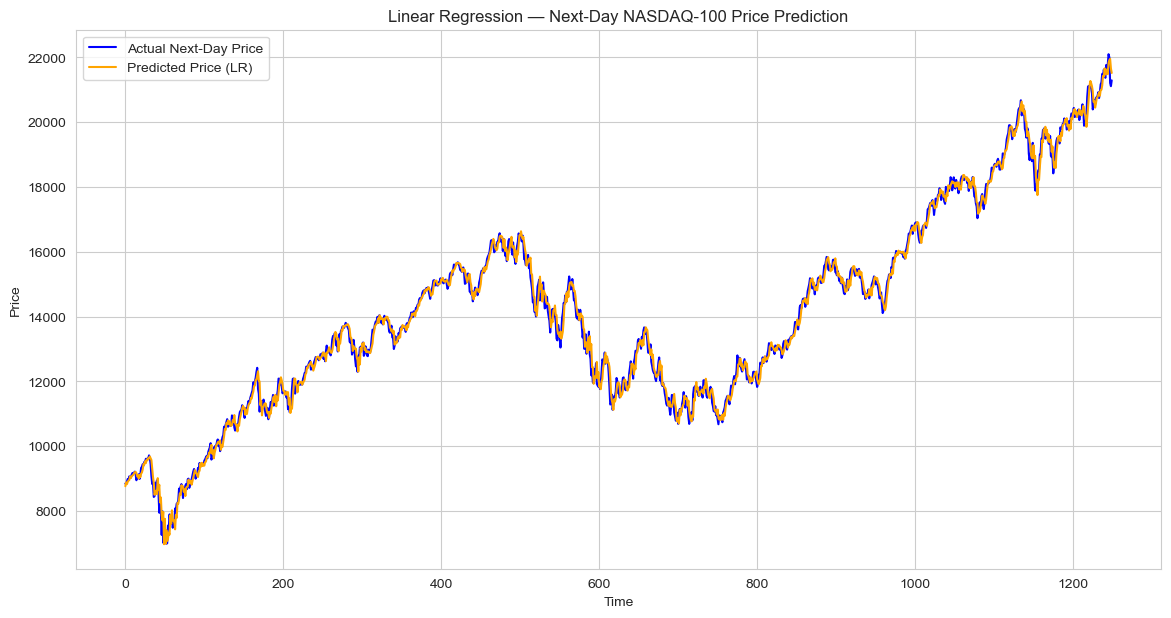

In [9]:
plt.figure(figsize=(14,7))
plt.plot(y_test.values, label="Actual Next-Day Price", color="blue")
plt.plot(test_pred, label="Predicted Price (LR)", color="orange")
plt.title("Linear Regression — Next-Day NASDAQ-100 Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

To give a short explanation of the plot.

The blue line is the actual next-day price and the orange line is the predicted next-day price. From the plot is it evident that these two curves/lines follow extremely closely. The model I developed does not predict unrealistic spikes. So overall, the Linear Regression model performs well which depicts that the simple lag features (such as previous day price and moving averages) capture short-term price movements effectively. 